# Examples

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6)
import numpy as np
import pyviral

## Set some constants

In [2]:
# United States population
N = 327e6

# United States birth rate per day - 12 per 1000
Alpha = 12/1000/365

# United States death rate per day - 8 per 1000
Mu = 8/1000/365

# Numerical integration step
dt = 0.001

## Example 1: Static population, Infection Rate = 2 / N, Recovery Rate = 50%

Plus real U.S. birth and death rates

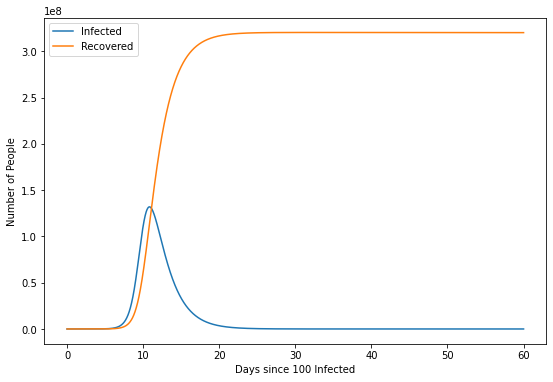

Infections peak at 132 million in 10 days


In [3]:
I0 = 100
t = 60
T = np.arange(0, t, dt)
S, I, R = pyviral.run(N - I0, I0, beta=2 / N, gamma=0.5, alpha=Alpha, mu=Mu, t=t, dt=dt)
plt.plot(T, I, label="Infected")
plt.plot(T, R, label="Recovered")
plt.xlabel("Days since %i Infected" % I0)
plt.ylabel("Number of People")
plt.legend()
plt.show()
print("Infections peak at %i million in %i days" % (np.round(np.max(I) / 1e6), T[np.argmax(I)]))

## Example 2: Example 1 but with immunity loss

Infections peak at 137 million in 10 days
Steady state of 41 million people infected.


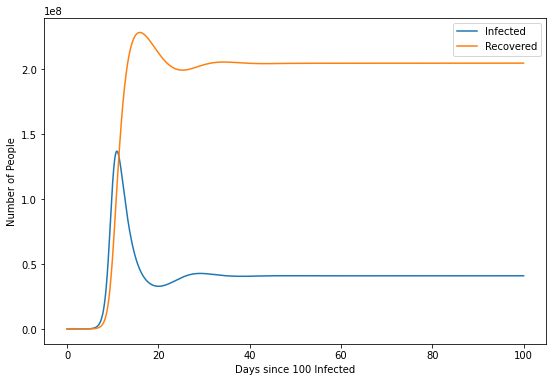

In [4]:
I0 = 100
t = 100
dt = 0.001
T = np.arange(0, t, dt)
S, I, R = pyviral.run(N - I0, I0, beta=2 / N, gamma=0.5, alpha=Alpha, mu=Mu, f=0.1, t=t, dt=dt)
plt.plot(T, I, label="Infected")
plt.plot(T, R, label="Recovered")
plt.xlabel("Days since %i Infected" % I0)
plt.ylabel("Number of People")
plt.legend()
print("Infections peak at %i million in %i days" % (np.round(np.max(I) / 1e6), T[np.argmax(I)]))
print("Steady state of %i million people infected." % np.round(I[-1] / 1e6))

## Example 3: Find a value for beta that gives a doubling every 6 days

During the early stages, assuming a 50% recovery rate.

In [5]:
# Ignore birth and death rates, approximate s ~ n in the very early days
# di / dt = beta * n * i - gamma * i
# i = i0 * exp((beta * n - gamma) * t)
# exp((beta * n - gamma) * 6) = 2
# beta * n - gamma = gamma + log(2) / 6
gamma = 0.5
beta = np.log(2) / (N * 6) + gamma / N
beta * N

0.6155245300933243

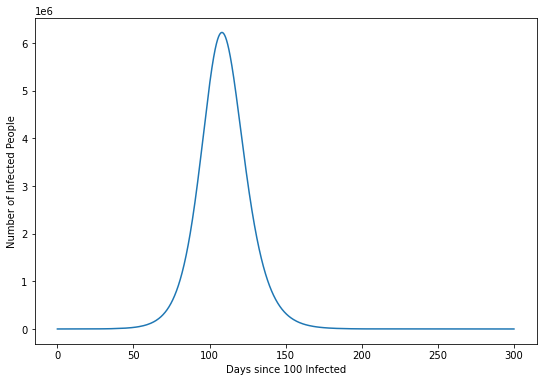

Infections peak at 6 million in 108 days


In [6]:
I0 = 100
t = 300
T = np.arange(0, t, dt)
S, I, R = pyviral.run(N - I0, I0, beta=beta, gamma=gamma, alpha=Alpha, mu=Mu, t=t, dt=dt)
plt.plot(T, I)
plt.xlabel("Days since %i Infected" % I0)
plt.ylabel("Number of Infected People")
plt.show()
print("Infections peak at %i million in %i days" % (np.max(I) / 1e6, T[np.argmax(I)]))